In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import lmdiag
import statsmodels.formula.api as sfa
import statsmodels.api as sfa
import numpy as np

In [2]:
df = pd.read_csv('datasets/simple-linear-regression/CustomerData.csv')
df.shape

(3209, 14)

In [3]:
df.head()

,CustomerID,City,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,FavoriteChannelOfTransaction,FavoriteGame,TotalRevenueGenerated
0,1001,1,2,3,8,210,11,11,2344,108,10,Uniform,Uniform,107.51
1,1002,1,2,3,6,442,20,20,245,22,7,Favorite,Uniform,382.40
2,1003,1,4,3,5,424,18,18,1059,130,18,Favorite,Uniform,135.01
3,1004,1,1,6,6,261,11,9,365,34,11,Favorite,Uniform,125.00
4,1005,1,3,6,9,422,44,31,1066,102,44,Uniform,Uniform,335.05


In [4]:
df.dtypes

CustomerID                        int64
City                              int64
NoOfChildren                      int64
MinAgeOfChild                     int64
MaxAgeOfChild                     int64
Tenure                            int64
FrquncyOfPurchase                 int64
NoOfUnitsPurchased                int64
FrequencyOFPlay                   int64
NoOfGamesPlayed                   int64
NoOfGamesBought                   int64
FavoriteChannelOfTransaction     object
FavoriteGame                     object
TotalRevenueGenerated           float64
dtype: object

In [5]:
df.describe()

,CustomerID,City,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,TotalRevenueGenerated
count,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000
mean,2605.000000,1.114054,2.128389,4.960735,7.990651,347.520411,16.269554,14.684014,1568.207853,93.627921,14.761608,168.477183
std,926.502833,0.317927,1.035092,3.714191,8.784084,90.520118,8.441670,7.182029,1810.630464,88.936372,8.773910,81.798528
min,1001.000000,1.000000,1.000000,0.000000,3.000000,100.000000,1.000000,1.000000,0.000000,0.000000,0.000000,100.000000
25%,1803.000000,1.000000,1.000000,4.000000,6.000000,301.000000,11.000000,10.000000,446.000000,37.000000,10.000000,116.640000
50%,2605.000000,1.000000,2.000000,5.000000,7.000000,368.000000,14.000000,13.000000,1029.000000,70.000000,14.000000,142.390000
75%,3407.000000,1.000000,3.000000,6.000000,8.000000,417.000000,19.000000,17.000000,2029.000000,119.000000,19.000000,191.250000
max,4209.000000,2.000000,11.000000,113.000000,113.000000,472.000000,119.000000,112.000000,27829.000000,1166.000000,115.000000,990.560000


In [6]:
df.drop('CustomerID', inplace = True, axis = 1)

In [7]:
df

,City,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,FavoriteChannelOfTransaction,FavoriteGame,TotalRevenueGenerated
0,1,2,3,8,210,11,11,2344,108,10,Uniform,Uniform,107.51
1,1,2,3,6,442,20,20,245,22,7,Favorite,Uniform,382.40
2,1,4,3,5,424,18,18,1059,130,18,Favorite,Uniform,135.01
3,1,1,6,6,261,11,9,365,34,11,Favorite,Uniform,125.00
4,1,3,6,9,422,44,31,1066,102,44,Uniform,Uniform,335.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3204,1,2,4,6,365,16,16,827,78,16,Favorite,Uniform,132.50
3205,1,2,2,5,348,20,20,2933,294,13,Favorite,Uniform,223.23
3206,1,2,5,7,341,16,13,1250,126,16,Uniform,Uniform,120.00
3207,1,2,6,7,368,18,14,1364,122,18,Favorite,Uniform,161.50


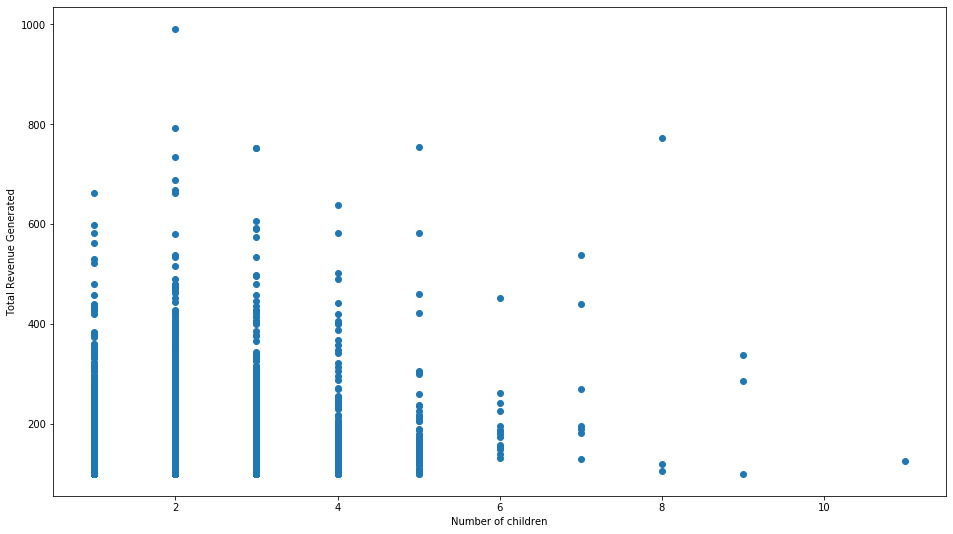

In [8]:
plt.figure(figsize = (16, 9))
plt.xlabel('Number of children')
plt.ylabel('Total Revenue Generated')
plt.scatter(df.NoOfChildren, df.TotalRevenueGenerated)
plt.show()

In [9]:
df.corr()

,City,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,TotalRevenueGenerated
City,1.000000,-0.065350,0.009865,-0.032211,0.052236,-0.099499,-0.066396,0.048818,0.016010,-0.034055,-0.071110
NoOfChildren,-0.065350,1.000000,-0.179176,0.189002,0.085341,0.137630,0.137040,0.165036,0.213342,0.131398,0.107365
MinAgeOfChild,0.009865,-0.179176,1.000000,0.367127,-0.055820,-0.017568,-0.006191,0.006690,0.000104,-0.007748,0.024724
MaxAgeOfChild,-0.032211,0.189002,0.367127,1.000000,-0.040329,-0.006213,-0.003926,0.012095,0.027947,-0.007062,0.005891
Tenure,0.052236,0.085341,-0.055820,-0.040329,1.000000,0.193344,0.192413,0.241809,0.273696,0.188285,0.116437
FrquncyOfPurchase,-0.099499,0.137630,-0.017568,-0.006213,0.193344,1.000000,0.934131,0.279957,0.397567,0.947787,0.663328
NoOfUnitsPurchased,-0.066396,0.137040,-0.006191,-0.003926,0.192413,0.934131,1.000000,0.311982,0.436149,0.868374,0.750379
FrequencyOFPlay,0.048818,0.165036,0.006690,0.012095,0.241809,0.279957,0.311982,1.000000,0.740204,0.286943,0.233540
NoOfGamesPlayed,0.016010,0.213342,0.000104,0.027947,0.273696,0.397567,0.436149,0.740204,1.000000,0.399178,0.293995
NoOfGamesBought,-0.034055,0.131398,-0.007748,-0.007062,0.188285,0.947787,0.868374,0.286943,0.399178,1.000000,0.495759


In [10]:
df.cov()

,City,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,TotalRevenueGenerated
City,0.101077,-0.021506,0.011649,-0.089956,1.503282,-0.267038,-0.151605,2.810191e+01,0.452675,-0.094996,-1.849286
NoOfChildren,-0.021506,1.071416,-0.688848,1.718470,7.996132,1.202601,1.018761,3.093050e+02,19.639743,1.193335,9.090452
MinAgeOfChild,0.011649,-0.688848,13.795216,11.977812,-18.767278,-0.550822,-0.165154,4.498884e+01,0.034326,-0.252505,7.511623
MaxAgeOfChild,-0.089956,1.718470,11.977812,77.160137,-32.067141,-0.460696,-0.247656,1.923723e+02,21.832555,-0.544312,4.233078
Tenure,1.503282,7.996132,-18.767278,-32.067141,8193.891806,147.741847,125.091240,3.963219e+04,2203.397871,149.538689,862.150020
FrquncyOfPurchase,-0.267038,1.202601,-0.550822,-0.460696,147.741847,71.261794,56.634766,4.279078e+03,298.481873,70.199255,458.038699
NoOfUnitsPurchased,-0.151605,1.018761,-0.165154,-0.247656,125.091240,56.634766,51.581543,4.057010e+03,278.587504,54.720159,440.832252
FrequencyOFPlay,28.101910,309.304976,44.988837,192.372268,39632.190426,4279.077995,4057.010213,3.278383e+06,119195.767823,4558.467583,34588.938622
NoOfGamesPlayed,0.452675,19.639743,0.034326,21.832555,2203.397871,298.481873,278.587504,1.191958e+05,7909.678223,311.486708,2138.770710
NoOfGamesBought,-0.094996,1.193335,-0.252505,-0.544312,149.538689,70.199255,54.720159,4.558468e+03,311.486708,76.981493,355.802807


Label Encoding:
    Uniform: 1
    Favorite: 2

One Hot Encoding: (Standard Process to convert numerical to Categories)

In [11]:
df.head()

,City,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,FavoriteChannelOfTransaction,FavoriteGame,TotalRevenueGenerated
0,1,2,3,8,210,11,11,2344,108,10,Uniform,Uniform,107.51
1,1,2,3,6,442,20,20,245,22,7,Favorite,Uniform,382.40
2,1,4,3,5,424,18,18,1059,130,18,Favorite,Uniform,135.01
3,1,1,6,6,261,11,9,365,34,11,Favorite,Uniform,125.00
4,1,3,6,9,422,44,31,1066,102,44,Uniform,Uniform,335.05


In [12]:
# LabelEncode and OneHotEncode
# Import label encoder 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
df_favch = pd.DataFrame(le.fit_transform(df.FavoriteChannelOfTransaction), columns = ['FavChannel'])
df_favch.head()

,FavChannel
0,1
1,0
2,0
3,0
4,1


In [13]:
df_favgm = pd.DataFrame(le.fit_transform(df.FavoriteGame), columns = ['FavGame'])
df_favgm.head()

,FavGame
0,1
1,1
2,1
3,1
4,1


In [14]:
df_le = pd.concat([df_favch, df_favgm], axis = 1)
df_le

,FavChannel,FavGame
0,1,1
1,0,1
2,0,1
3,0,1
4,1,1
...,...,...
3204,0,1
3205,0,1
3206,1,1
3207,0,1


In [15]:
# Step2 - One Hot Encoding
# This Step created dummy variables of the Label encoded variables.
# Favch - Uniform = 1, and favourite = 0
# FavGame - Uniform = 1 and favourite = 0
ohe = OneHotEncoder()
df_le_ohe = pd.DataFrame(ohe.fit_transform(df_le).toarray().astype(np.int64),
                                           columns = ['favch_favorite', 'favch_unifrom', 'favgm_favorite', 'favgm_unifrom'])
df_le_ohe.head()

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


,favch_favorite,favch_unifrom,favgm_favorite,favgm_unifrom
0,0,1,0,1
1,1,0,0,1
2,1,0,0,1
3,1,0,0,1
4,0,1,0,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3209 entries, 0 to 3208
Data columns (total 13 columns):
City                            3209 non-null int64
NoOfChildren                    3209 non-null int64
MinAgeOfChild                   3209 non-null int64
MaxAgeOfChild                   3209 non-null int64
Tenure                          3209 non-null int64
FrquncyOfPurchase               3209 non-null int64
NoOfUnitsPurchased              3209 non-null int64
FrequencyOFPlay                 3209 non-null int64
NoOfGamesPlayed                 3209 non-null int64
NoOfGamesBought                 3209 non-null int64
FavoriteChannelOfTransaction    3209 non-null object
FavoriteGame                    3209 non-null object
TotalRevenueGenerated           3209 non-null float64
dtypes: float64(1), int64(10), object(2)
memory usage: 326.0+ KB


In [17]:
df_cleanedpart = pd.concat([df, df_le_ohe], axis = 1).drop(['FavoriteChannelOfTransaction', 'FavoriteGame'], axis = 1)

In [18]:
df_cleanedpart.head(10)

,City,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,TotalRevenueGenerated,favch_favorite,favch_unifrom,favgm_favorite,favgm_unifrom
0,1,2,3,8,210,11,11,2344,108,10,107.51,0,1,0,1
1,1,2,3,6,442,20,20,245,22,7,382.40,1,0,0,1
2,1,4,3,5,424,18,18,1059,130,18,135.01,1,0,0,1
3,1,1,6,6,261,11,9,365,34,11,125.00,1,0,0,1
4,1,3,6,9,422,44,31,1066,102,44,335.05,0,1,0,1
5,1,2,3,4,378,16,16,228,12,16,150.00,1,0,1,0
6,1,3,8,12,369,25,15,75,2,25,127.50,1,0,1,0
7,1,2,6,8,404,13,12,1488,118,13,122.50,1,0,0,1
8,1,4,6,9,420,20,16,2743,163,16,164.96,0,1,0,1
9,2,3,5,6,333,15,15,1967,56,15,112.62,1,0,0,1


In [19]:
df_cleanedpart.dtypes

City                       int64
NoOfChildren               int64
MinAgeOfChild              int64
MaxAgeOfChild              int64
Tenure                     int64
FrquncyOfPurchase          int64
NoOfUnitsPurchased         int64
FrequencyOFPlay            int64
NoOfGamesPlayed            int64
NoOfGamesBought            int64
TotalRevenueGenerated    float64
favch_favorite             int64
favch_unifrom              int64
favgm_favorite             int64
favgm_unifrom              int64
dtype: object

In [20]:
# values are unequal scale in the partially cleaned dataset
# lets bring all values to scale by using standard scalar technique
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_cleanedfull = pd.DataFrame(sc.fit_transform(df_cleanedpart), columns = df_cleanedpart.columns)
df_cleanedfull.head()

,City,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,TotalRevenueGenerated,favch_favorite,favch_unifrom,favgm_favorite,favgm_unifrom
0,-0.3588,-0.124056,-0.527986,0.001064,-1.519462,-0.624329,-0.513029,0.428532,0.161625,-0.542785,-0.745450,-2.147124,2.147124,-0.202162,0.202162
1,-0.3588,-0.124056,-0.527986,-0.226656,1.043904,0.441977,0.740294,-0.730913,-0.805509,-0.884762,2.615648,0.465739,-0.465739,-0.202162,0.202162
2,-0.3588,1.808440,-0.527986,-0.340516,0.845022,0.205020,0.461778,-0.281276,0.409031,0.369151,-0.409205,0.465739,-0.465739,-0.202162,0.202162
3,-0.3588,-1.090303,0.279853,-0.226656,-0.955963,-0.624329,-0.791545,-0.664628,-0.670560,-0.428793,-0.531598,0.465739,-0.465739,-0.202162,0.202162
4,-0.3588,0.842192,0.279853,0.114924,0.822924,3.285460,2.272134,-0.277410,0.094150,3.332944,2.036697,-2.147124,2.147124,-0.202162,0.202162


In [21]:
# Segregate the independent vars and dependent vars

# Independent Vars DataFrame
x = df_cleanedfull.drop(['TotalRevenueGenerated'], axis = 1)

# Dependent Vars DataFrame
y = df_cleanedfull['TotalRevenueGenerated']

In [22]:
x.head()

,City,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,favch_favorite,favch_unifrom,favgm_favorite,favgm_unifrom
0,-0.3588,-0.124056,-0.527986,0.001064,-1.519462,-0.624329,-0.513029,0.428532,0.161625,-0.542785,-2.147124,2.147124,-0.202162,0.202162
1,-0.3588,-0.124056,-0.527986,-0.226656,1.043904,0.441977,0.740294,-0.730913,-0.805509,-0.884762,0.465739,-0.465739,-0.202162,0.202162
2,-0.3588,1.808440,-0.527986,-0.340516,0.845022,0.205020,0.461778,-0.281276,0.409031,0.369151,0.465739,-0.465739,-0.202162,0.202162
3,-0.3588,-1.090303,0.279853,-0.226656,-0.955963,-0.624329,-0.791545,-0.664628,-0.670560,-0.428793,0.465739,-0.465739,-0.202162,0.202162
4,-0.3588,0.842192,0.279853,0.114924,0.822924,3.285460,2.272134,-0.277410,0.094150,3.332944,-2.147124,2.147124,-0.202162,0.202162


In [23]:
y.head()

0   -0.745450
1    2.615648
2   -0.409205
3   -0.531598
4    2.036697
Name: TotalRevenueGenerated, dtype: float64

In [24]:
# Train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 40)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2246, 14) (963, 14) (2246,) (963,)


In [25]:
# Fit a Linearmodel on train
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lm = LinearRegression()
lm = lm.fit(X_train, y_train)

# Predict the model on trian
pred_train = lm.predict(X_train)
print('MSE on train: ', mean_squared_error(y_train, pred_train))
print('RSquared: ', lm.score(X_train, y_train))

# Predict on test
pred_test = lm.predict(X_test)
print('MSE on test: ', mean_squared_error(y_test, pred_test))
print('RSquared:', lm.score(X_test, y_test))


MSE on train:  0.28291061182431065
RSquared:  0.7319155669253261
MSE on test:  0.27991176762868786
RSquared: 0.6786241414877126


###  Using OLS - Oridnary Least Square Method

In [26]:
import statsmodels.formula.api as sfa
import statsmodels.api as sa
import lmdiag

In [27]:
model = sfa.ols(
    formula='TotalRevenueGenerated~City+NoOfChildren+MinAgeOfChild+MaxAgeOfChild+Tenure+FrquncyOfPurchase+' + 
    'NoOfUnitsPurchased+FrequencyOFPlay+NoOfGamesPlayed+NoOfGamesBought+favch_favorite+favch_unifrom+' +
    'favgm_favorite+favgm_unifrom',
    data=df_cleanedpart).fit()

In [28]:
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     TotalRevenueGenerated   R-squared:                       0.719
Model:                               OLS   Adj. R-squared:                  0.718
Method:                    Least Squares   F-statistic:                     681.5
Date:                   Tue, 07 Jan 2020   Prob (F-statistic):               0.00
Time:                           15:10:33   Log-Likelihood:                -16649.
No. Observations:                   3209   AIC:                         3.332e+04
Df Residuals:                       3196   BIC:                         3.340e+04
Df Model:                             12                                         
Covariance Type:               nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Interc

### Multicolinieriaty


In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [30]:
vif = pd.DataFrame()
df_cleanedpart_X = df_cleanedpart.drop(['TotalRevenueGenerated'], axis = 1)
vif['Features'] = df_cleanedpart_X.keys()
vif['vif'] = [ variance_inflation_factor(exog = df_cleanedpart_X.values, exog_idx = i) for i in range(len(df_cleanedpart_X.keys())) ]
vif

C:\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,vif
0,City,1.078320
1,NoOfChildren,1.186205
2,MinAgeOfChild,1.256318
3,MaxAgeOfChild,1.258436
4,Tenure,1.106201
5,FrquncyOfPurchase,21.622966
6,NoOfUnitsPurchased,9.048614
7,FrequencyOFPlay,2.231091
8,NoOfGamesPlayed,2.553885
9,NoOfGamesBought,10.717422


In [31]:
vif = pd.DataFrame()
df_cleanedfull_X = df_cleanedfull.drop(['TotalRevenueGenerated'], axis = 1)
vif['Features'] = df_cleanedfull_X.keys()
vif['vif'] = [ variance_inflation_factor(exog = df_cleanedfull_X.values, exog_idx = i) for i in range(len(df_cleanedfull_X.keys())) ]
vif


,Features,vif
0,City,1.078320
1,NoOfChildren,1.186205
2,MinAgeOfChild,1.256318
3,MaxAgeOfChild,1.258436
4,Tenure,1.106201
5,FrquncyOfPurchase,21.622966
6,NoOfUnitsPurchased,9.048614
7,FrequencyOFPlay,2.231091
8,NoOfGamesPlayed,2.553885
9,NoOfGamesBought,10.717422


In [32]:
from sklearn.datasets import load_boston

In [33]:
# Read Boston Data
boston = load_boston()
X = pd.DataFrame(boston.data, columns = boston.feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [34]:
y = boston.target